#### Conway Juego de la vida  optimizado con numpy+cython

In [1]:
##%load_ext autotime
%load_ext cython



In [2]:
%%cython -a
import numpy as np
cimport numpy as np

import random

cimport cython

@cython.boundscheck(False)
@cython.cdivision(True)
cdef int vecinosVivos(np.uint16_t[:,:] M,int p,int q):
    cdef int v = 0
    cdef int i,j
    
    cdef int N = M.shape[0]
    
    for i in range(p - 1,p + 2):
        for j in range(q - 1,q + 2):
            if i == j:
                continue
            v += M[i % N,j % N]
            
    return v

@cython.boundscheck(False)
def siguiente(np.ndarray[np.uint16_t,ndim=2] M):
    cdef int N = M.shape[0]
    cdef np.ndarray[np.uint16_t,ndim=2] M2 = np.zeros((N,N), \
        dtype=np.uint16)
    
    cdef np.uint16_t[:,:] MV = M
    cdef np.uint16_t[:,:] M2V = M2 
    
    cdef int p
    cdef int q
    cdef int vivos

    for p in range(N):
        for q in range(N):
            vivos = vecinosVivos(MV,p,q)

            if (MV[p,q] == 1) and (2 <= vivos <= 3):
                M2V[p,q] = 1
            elif  (MV[p,q] == 0) and (vivos == 3):
                M2V[p,q] = 1
    
    return M2

In [3]:
M = np.random.randint(0,2,size=4096**2).\
    reshape((4096,4096)).astype(np.uint16)
%timeit MM = siguiente(M)

1 loop, best of 3: 1.04 s per loop


<IPython.core.display.Javascript object>


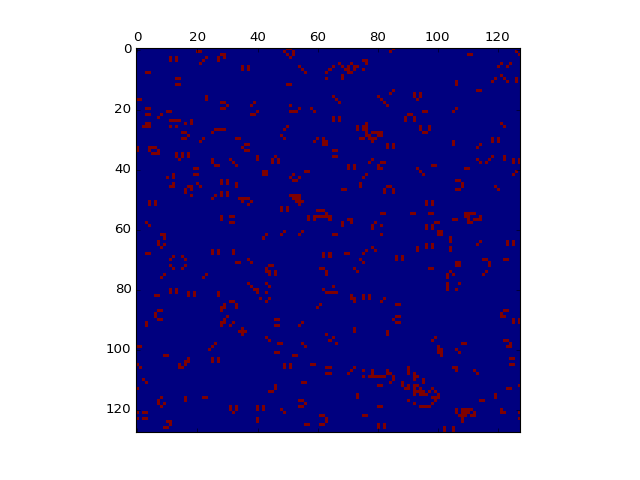

In [9]:
#### ANIMACIÓN 

import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation

%matplotlib notebook

c = 128

M = np.random.randint(0,2,size=c**2).\
    reshape((c,c)).astype(np.uint16)

def generate_data(M):
       return siguiente(M)

def update(data):
    mat.set_data(data)
    return mat 

def data_gen():
    global M
    M = generate_data(M)
    yield M

fig, ax = plt.subplots()
mat = ax.matshow(generate_data(M))

ani = animation.FuncAnimation(fig, update, data_gen,interval=1000)
plt.show()
